In [1]:
import brainpy as bp

/Users/admin/miniconda3/envs/JVLabEnv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1. Single Node and Dynamic Properties

In [2]:
c1 = 16
c2 = 10.
c3 = 15.
c4 = 3.
aE = 1.3
aI = 2.
thetaE = 4.
thetaI = 3.7
tauE = 10
tauI = 10

In [3]:
wc = bp.rates.WilsonCowanModel(2,
                               wEE=c1, wIE=c2, wEI=c3, wII=c4,
                               E_tau=tauE, I_tau=tauI,
                               E_a=aE, I_a=aI, E_theta=thetaE, I_theta=thetaI,
                               r=1., method='exp_euler_auto')

wc.x = bp.math.asarray([0.1, 0.1])
wc.y = bp.math.asarray([0., 0.5])

runner = bp.DSRunner(wc, monitors=['x', 'y'], inputs=['input', 1.1])
runner.run(2000.)

Predict 20000 steps: : 100%|██████████| 20000/20000 [00:00<00:00, 85614.73it/s]


Array(value=Array([[0.10035493, 0.09895828],
                   [0.1007128 , 0.09792698],
                   [0.10107367, 0.096906  ],
                   ...,
                   [0.11077694, 0.08496234],
                   [0.11111974, 0.08503836],
                   [0.11146671, 0.08511524]]),
      dtype=float32)

In [4]:
print(runner.mon)

{'x': array([[0.10035493, 0.09895828],
       [0.1007128 , 0.09792698],
       [0.10107367, 0.096906  ],
       ...,
       [0.11077694, 0.08496234],
       [0.11111974, 0.08503836],
       [0.11146671, 0.08511524]], shape=(20000, 2), dtype=float32), 'y': array([[1.14553746e-04, 4.95024979e-01],
       [2.29147146e-04, 4.90099430e-01],
       [3.43802152e-04, 4.85222906e-01],
       ...,
       [1.01232063e-02, 9.46164317e-03],
       [1.01712001e-02, 9.43376683e-03],
       [1.02202380e-02, 9.40634497e-03]], shape=(20000, 2), dtype=float32), 'ts': array([0.0000e+00, 1.0000e-01, 2.0000e-01, ..., 1.9997e+03, 1.9998e+03,
       1.9999e+03], shape=(20000,))}


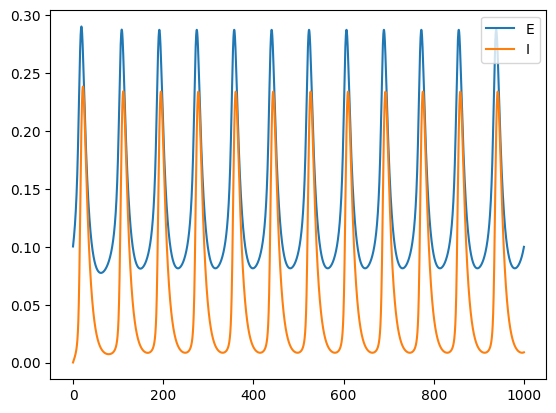

In [5]:
import matplotlib.pyplot as plt
plt.plot(runner.mon.ts[0:10000],runner.mon['x'][0:10000,0], label = "E")
plt.plot(runner.mon.ts[0:10000],runner.mon['y'][0:10000,0], label = "I")
plt.legend()

I am plotting the trajectory ...
I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 924 candidates
I am trying to filter out duplicate fixed points ...
	Found 1 fixed points.
	#1 x=0.21078167778457124, y=0.1227244795202266 is a unstable focus.


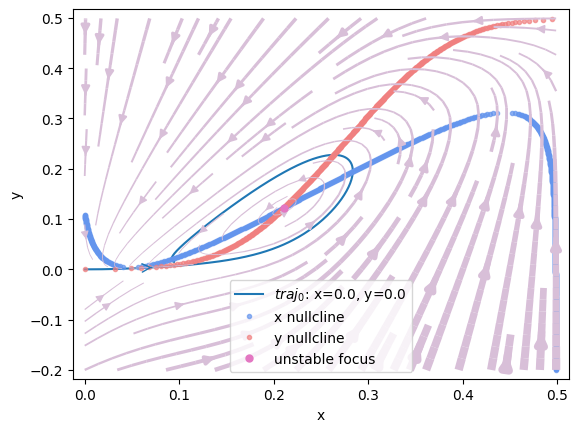

In [6]:
bp.math.enable_x64()
analyzer = bp.analysis.PhasePlane2D(
  model=wc,
  pars_update = {'x_ext':1.1, 'y_ext':0},
  target_vars={'x': [0.0, 0.5], 'y': [-0.2, 0.5]},
  resolutions=0.001,
)
analyzer.plot_trajectory({'x': [0.0], 'y': [0.0]}, duration=300.)
analyzer.plot_nullcline()
analyzer.plot_vector_field()
analyzer.plot_fixed_point()

analyzer.show_figure()

I am making bifurcation analysis ...
I am filtering out fixed point candidates with auxiliary function ...
I am trying to find fixed points by optimization ...
	There are 10000 candidates
I am trying to filter out duplicate fixed points ...
	Found 120 fixed points.


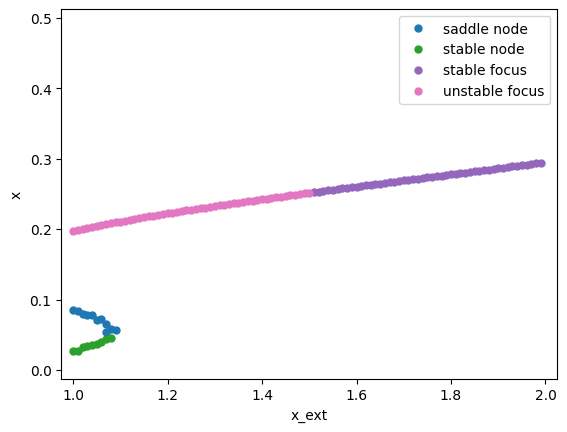

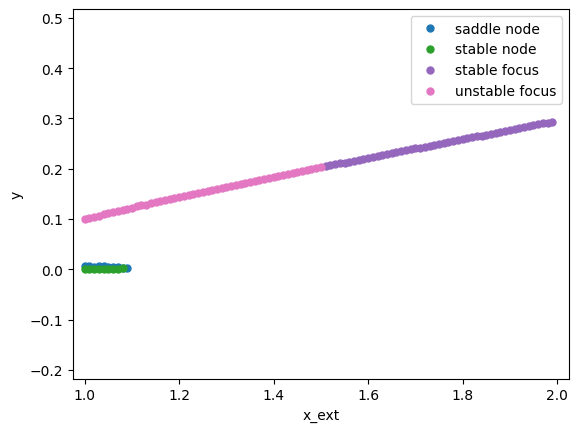

In [7]:
bif = bp.analysis.Bifurcation2D(
    model=wc,
    target_pars={'x_ext': [1,2]},
    target_vars={'x': [0.0, 0.5],'y': [-0.2, 0.5]},
    pars_update={"y_ext":0},
    resolutions={'x_ext': 0.01}
)
bif.plot_bifurcation(show=True)

E/Iratio

Predict 20000 steps: : 100%|██████████| 20000/20000 [00:00<00:00, 90777.94it/s]
I am plotting the trajectory ...
I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 684 candidates
I am trying to filter out duplicate fixed points ...
	Found 2 fixed points.
	#1 x=0.044564617706270376, y=0.0021688800379023473 is a stable node.
	#2 x=0.16113653748355114, y=0.050405217615126834 is a unstable focus.


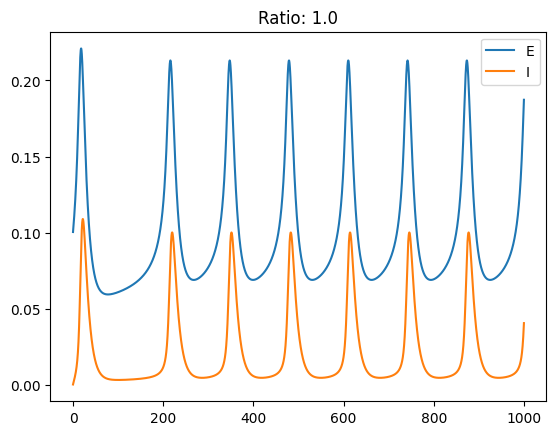

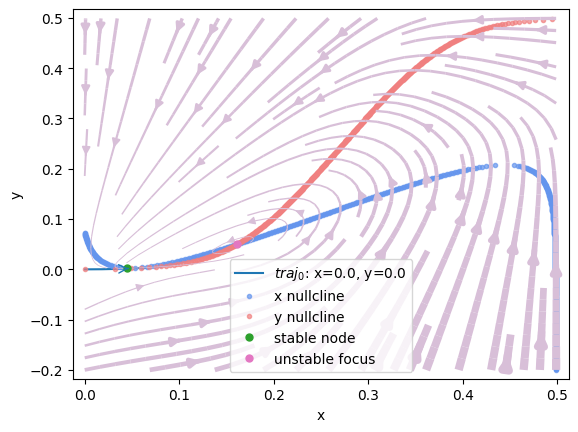

Predict 20000 steps: : 100%|██████████| 20000/20000 [00:00<00:00, 92697.74it/s]
I am plotting the trajectory ...
I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 804 candidates
I am trying to filter out duplicate fixed points ...
	Found 2 fixed points.
	#1 x=0.048044120009602516, y=0.002436798623189824 is a stable node.
	#2 x=0.18634549335898487, y=0.08261811047308275 is a unstable focus.


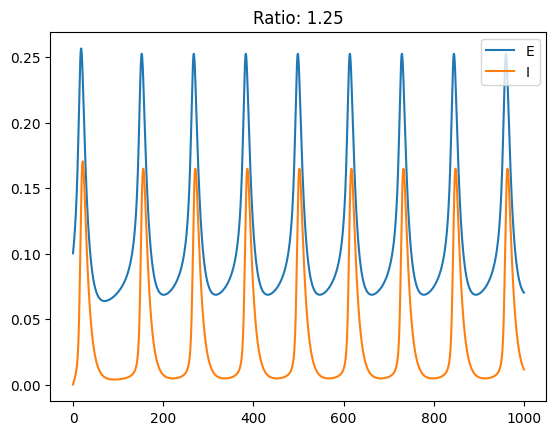

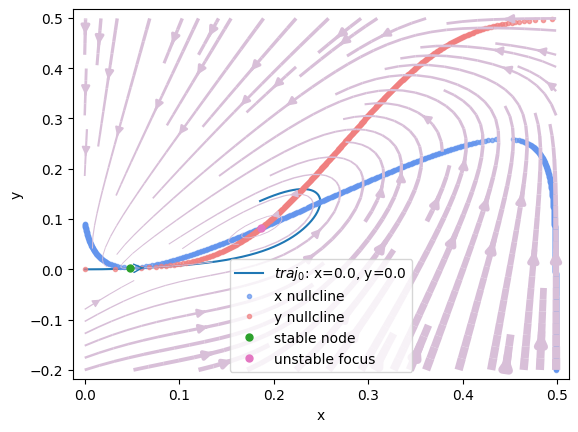

Predict 20000 steps: : 100%|██████████| 20000/20000 [00:00<00:00, 94355.27it/s]
I am plotting the trajectory ...
I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 924 candidates
I am trying to filter out duplicate fixed points ...
	Found 1 fixed points.
	#1 x=0.21078167778457124, y=0.1227244795202266 is a unstable focus.


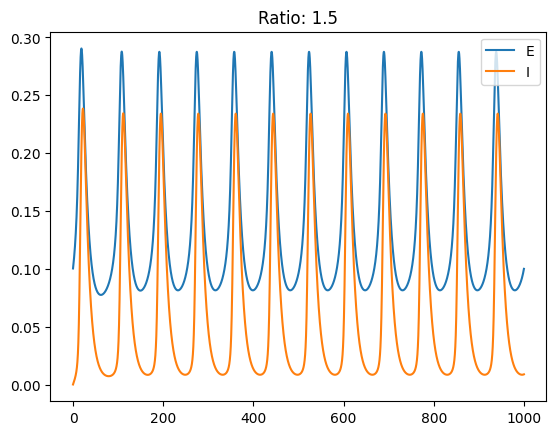

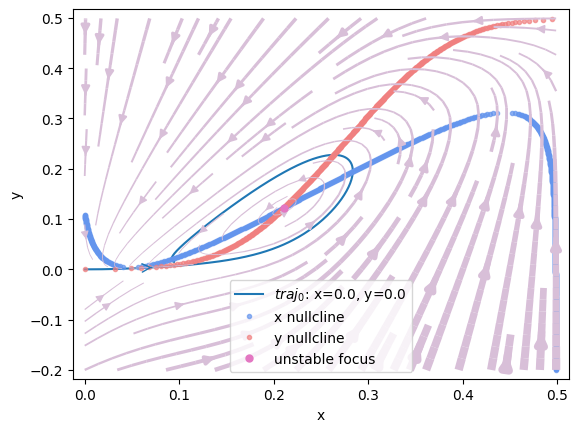

Predict 20000 steps: : 100%|██████████| 20000/20000 [00:00<00:00, 92794.54it/s]
I am plotting the trajectory ...
I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 1047 candidates
I am trying to filter out duplicate fixed points ...
	Found 1 fixed points.
	#1 x=0.2375527241614686, y=0.17398856219879555 is a unstable focus.


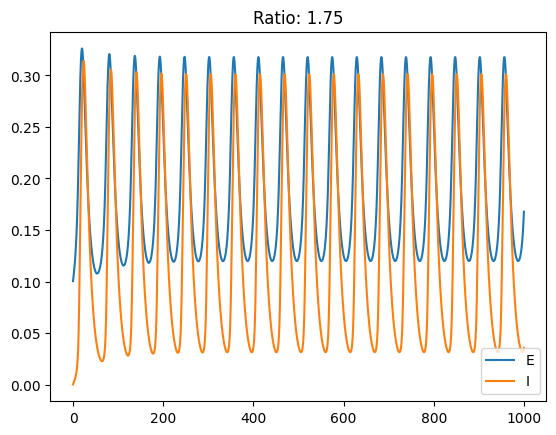

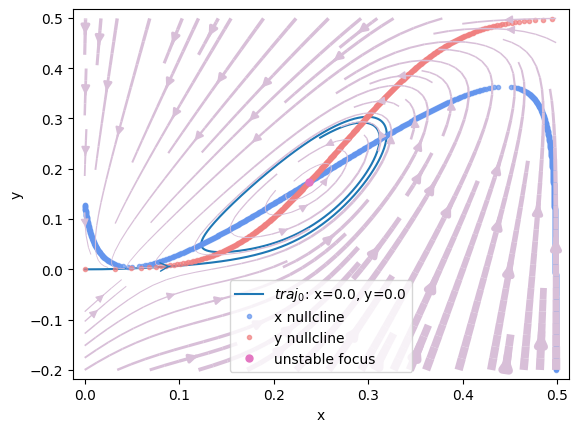

Predict 20000 steps: : 100%|██████████| 20000/20000 [00:00<00:00, 93859.29it/s]
I am plotting the trajectory ...
I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 1167 candidates
I am trying to filter out duplicate fixed points ...
	Found 1 fixed points.
	#1 x=0.26930024486272464, y=0.24066183487556533 is a stable focus.


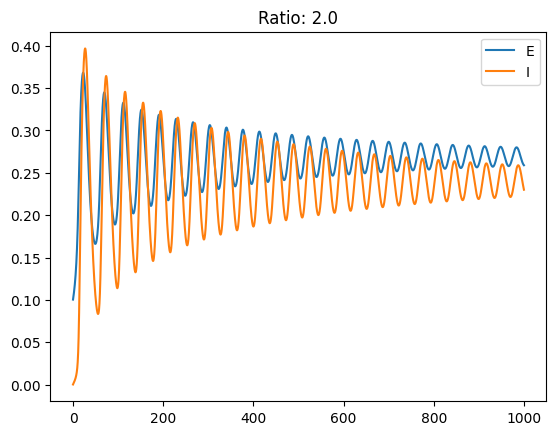

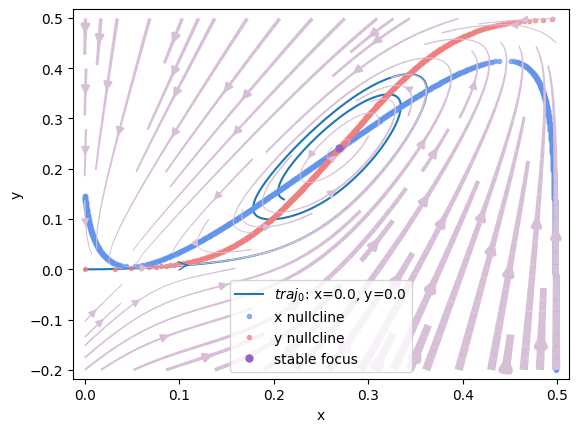

Predict 20000 steps: : 100%|██████████| 20000/20000 [00:00<00:00, 93785.83it/s]
I am plotting the trajectory ...
I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 1287 candidates
I am trying to filter out duplicate fixed points ...
	Found 1 fixed points.
	#1 x=0.3158688838017055, y=0.3382294849851238 is a stable focus.


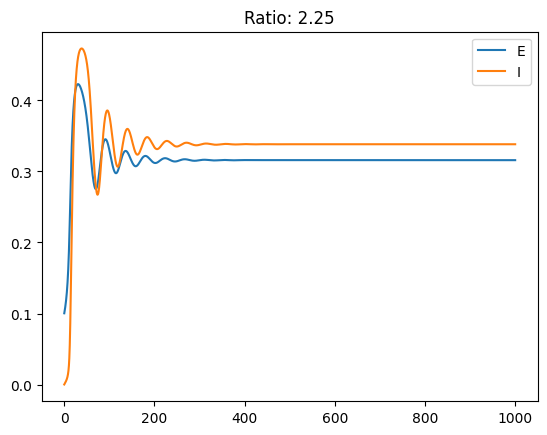

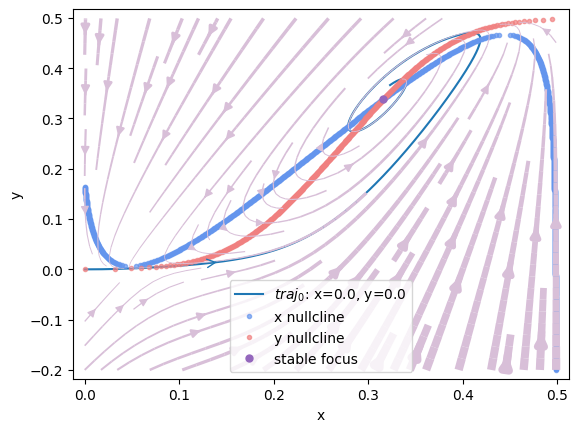

Predict 20000 steps: : 100%|██████████| 20000/20000 [00:00<00:00, 90990.53it/s]
I am plotting the trajectory ...
I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 1368 candidates
I am trying to filter out duplicate fixed points ...
	Found 1 fixed points.
	#1 x=0.47237015606771743, y=0.4943882424186624 is a stable node.


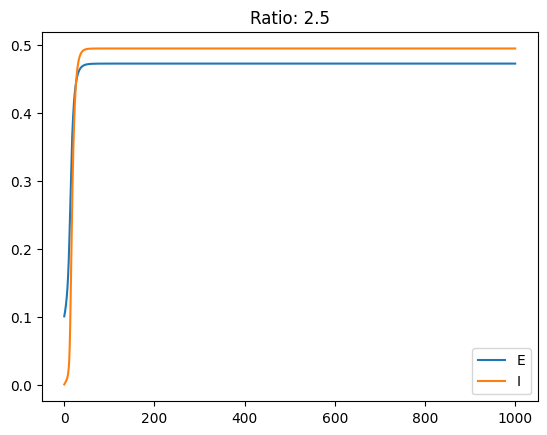

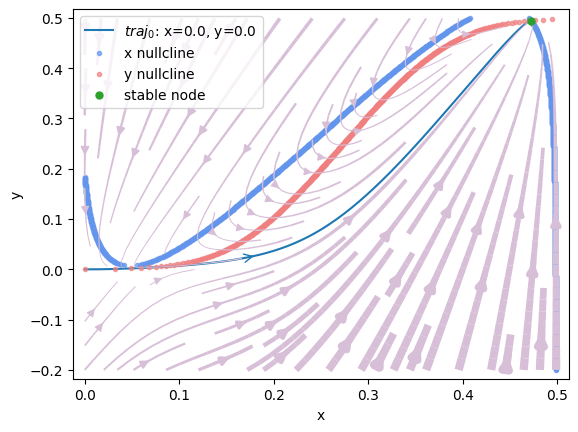

Predict 20000 steps: : 100%|██████████| 20000/20000 [00:00<00:00, 92495.77it/s]
I am plotting the trajectory ...
I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 1386 candidates
I am trying to filter out duplicate fixed points ...
	Found 1 fixed points.
	#1 x=0.48332877110070654, y=0.4958073214379945 is a stable node.


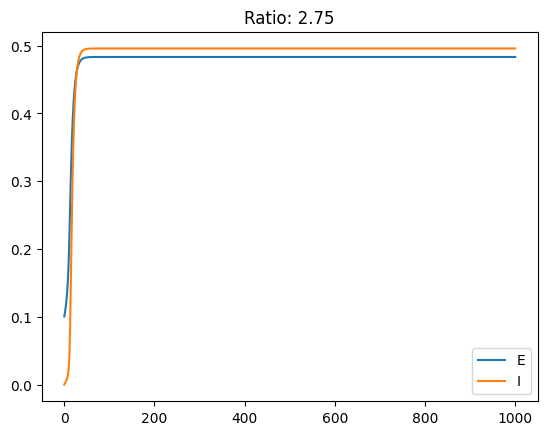

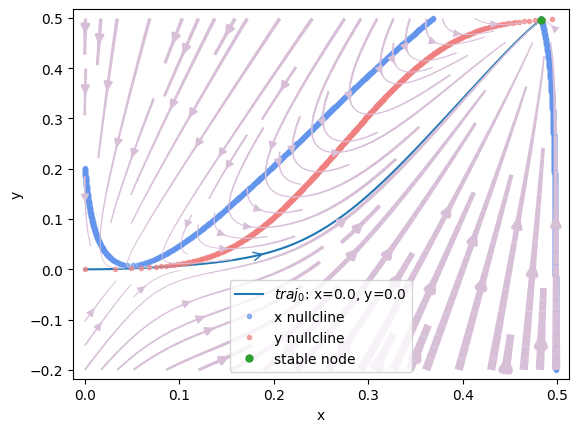

Predict 20000 steps: : 100%|██████████| 20000/20000 [00:00<00:00, 92234.30it/s]
I am plotting the trajectory ...
I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 1402 candidates
I am trying to filter out duplicate fixed points ...
	Found 1 fixed points.
	#1 x=0.4881307662339906, y=0.4963986015442388 is a stable node.


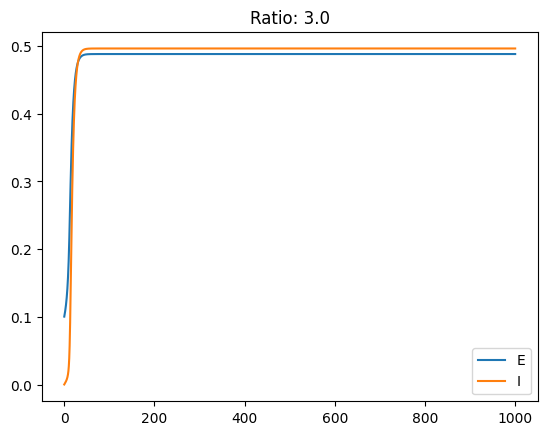

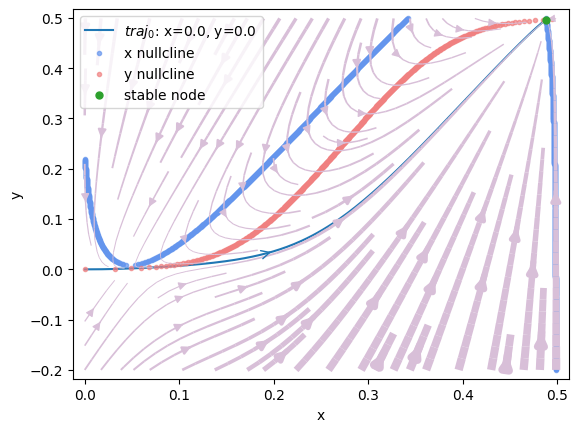

In [8]:
import jax.numpy as jnp

c1 = 16
c3 = 15.
c4 = 3.
aE = 1.3
aI = 2.
thetaE = 4.
thetaI = 3.7
tauE = 10
tauI = 10

for ratio in jnp.arange(1, 3.25, 0.25):
    c2 = c3 / ratio

    wc = bp.rates.WilsonCowanModel(2,
                                   wEE=c1, wIE=c2, wEI=c3, wII=c4,
                                   E_tau=tauE, I_tau=tauI,
                                   E_a=aE, I_a=aI, E_theta=thetaE, I_theta=thetaI,
                                   r=1., method='exp_euler_auto')

    wc.x = bp.math.asarray([0.1, 0.1])
    wc.y = bp.math.asarray([0., 0.5])

    runner = bp.DSRunner(wc, monitors=['x', 'y'], inputs=['input', 1.1])
    runner.run(2000.)

    plt.figure()
    plt.plot(runner.mon.ts[0:10000], runner.mon['x'][0:10000, 0], label="E")
    plt.plot(runner.mon.ts[0:10000], runner.mon['y'][0:10000, 0], label="I")
    plt.legend()
    plt.title(f'Ratio: {ratio}')

    bp.math.enable_x64()
    analyzer = bp.analysis.PhasePlane2D(
        model=wc,
        pars_update={'x_ext': 1.1, "y_ext": 0},
        target_vars={'x': [0.0, 0.5], 'y': [-0.2, 0.5]},
        resolutions=0.001,
    )
    plt.figure()
    analyzer.plot_trajectory({'x': [0.0], 'y': [0.0]}, duration=300.)
    analyzer.plot_nullcline()
    analyzer.plot_vector_field()
    analyzer.plot_fixed_point()

    analyzer.show_figure()
